### Logistic Regression - Breast Cancer Classification

In [17]:
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
from sklearn.datasets import load_breast_cancer;
from sklearn.model_selection import train_test_split;
from sklearn.metrics import accuracy_score, confusion_matrix;
from sklearn.linear_model import LogisticRegression;

In [4]:
data = load_breast_cancer();
print(data);

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [5]:
x = data.data;
y = data.target;

print(x);
print(y);

print("Feature: ", x.shape);
print("Target: ", y.shape);
print("Classes: ", data.target_names);

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [6]:
print(data.feature_names);

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


The dataset loaded of breast_cancer is stored as a Bunch object which is a dictionary like object provided by scikit-learn

In [7]:
print(data.keys());

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [8]:
data = load_breast_cancer(as_frame=True)
df = data.frame   # DataFrame with features + target
print(df.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

#### Train/Test Split and Normalisation

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42);

mean_train = x_train.mean(axis = 0);
std_train = x_train.std(axis = 0);

x_train_s = (x_train - mean_train)/std_train;
x_test_s = (x_test - mean_train)/ std_train;

def add_bias(x):
    return np.c_[np.ones((x.shape[0], 1)), x];

x_train_b = add_bias(x_train_s);
x_test_b = add_bias(x_test_s);

$$
J(\theta) = -\frac{1}{n} \sum_{i=1}^{n} \Big( y_i \log \hat{y}_i + (1 - y_i) \log (1 - \hat{y}_i) \Big)
$$


In [10]:
#Sigmoid Function
def sigmoid(z):
    return 1/(1+np.exp(-z));

#Cost Function
def compute_cost(x_b, y, theta):
    n = len(y);
    prediction = sigmoid(x_b.dot(theta));
    cost = -(1/n)* np.sum(y*np.log(prediction+ 1e-15) + (1-y)*np.log(1-prediction+1e-15))
    return cost;

#Gradient Descent
def gradient_descent(x_b, y, theta_init, lr=0.01, epochs = 1000):
    theta = theta_init.copy();
    cost_history = [];
    
    for i in range(epochs):
        prediction = sigmoid( x_b.dot(theta) );
        error = prediction-y;
        gradient = (1/len(y))* (x_b.T.dot(error));
        theta -= lr*gradient;
        cost_history.append(compute_cost(x_b, y, theta));
        
    return theta, cost_history;

    

In [11]:
#TRAINING
theta0 = np.zeros(x_train_b.shape[1])

theta, cost_hist = gradient_descent(x_train_b, y_train, theta0, lr=0.1, epochs=5000);

print("Learned parameters: ", theta);
print("Final cost", cost_hist[-1]);

Learned parameters:  [ 0.36599907 -0.47143414 -0.45938962 -0.41788662 -0.56433411 -0.08189736
  0.8214395  -1.01785564 -1.35941539  0.40042537  0.13919246 -1.75128935
  0.22647193 -0.91572182 -1.25253008 -0.42787252  1.04511375  0.12905899
 -0.3922514   0.65001911  0.87101584 -1.14468673 -1.75147053 -0.78805044
 -1.13157374 -0.80271624  0.05747481 -1.27311748 -1.10166135 -1.6706767
 -0.2125358 ]
Final cost 0.04765985074289068


In [12]:
#PREDICTING
y_pred_prob = sigmoid( x_test_b.dot(theta) );
y_pred = (y_pred_prob >= 0.5).astype(int)

print("Test Accuracy: ", accuracy_score(y_test, y_pred));

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm);

Test Accuracy:  0.9824561403508771
Confusion Matrix:
 [[42  1]
 [ 1 70]]


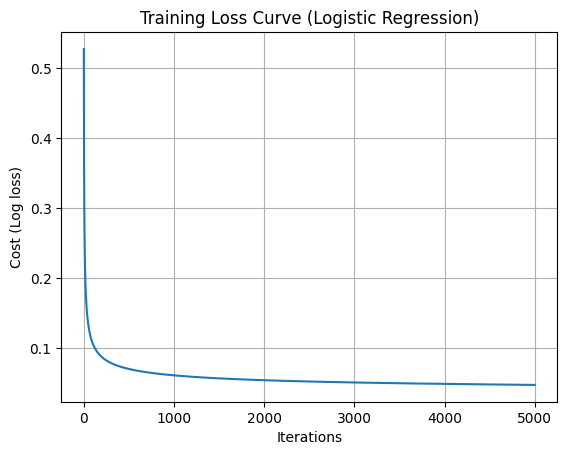

In [14]:
#VISUALISATION

plt.plot(cost_hist);
plt.xlabel("Iterations")
plt.ylabel("Cost (Log loss)");
plt.title("Training Loss Curve (Logistic Regression)");
plt.grid(True);
plt.show();


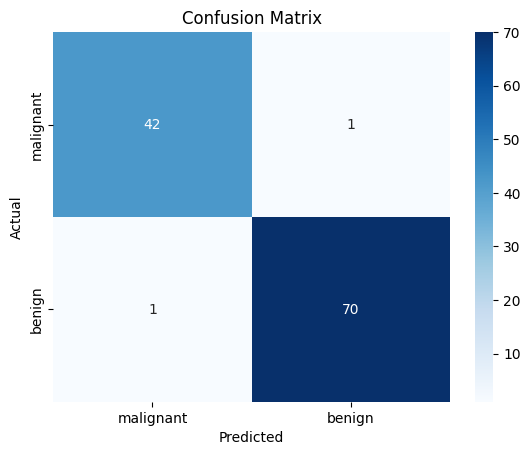

In [16]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names );
plt.xlabel("Predicted");
plt.ylabel("Actual");
plt.title("Confusion Matrix");
plt.show();

### SCIKIT_LEARN LIBRARY

In [18]:
classification = LogisticRegression(max_iter = 5000);
classification.fit(x_train_s, y_train);

print("Scikit Learn Accuracy:", classification.score(x_test_s, y_test));

Scikit Learn Accuracy: 0.9736842105263158


## LOGISTIC REGRESSION COMPLETED SUCCESSFULLY